# Text Mining

2. Start a new notebook in JupyterLab and import all of the libraries you’ll need.

In [1]:

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sydneyhoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sydneyhoy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sydneyhoy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

3. Load the twentieth-century data that you scraped in Exercise 1.4.

In [2]:
# Import txt file

with open('20th_Century_wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

4. Tokenize the words from the text and create a bar chart to plot the 10 most common words.

In [3]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance                 Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 The world at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)         1.1.2 The Russian Revolution and Communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictatorshi

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2', 'The', 'Russian', 'Revolution', 'and', 'Comm

In [5]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4884 samples and 21175 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1572),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 397),
 ('The', 331),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 291)]

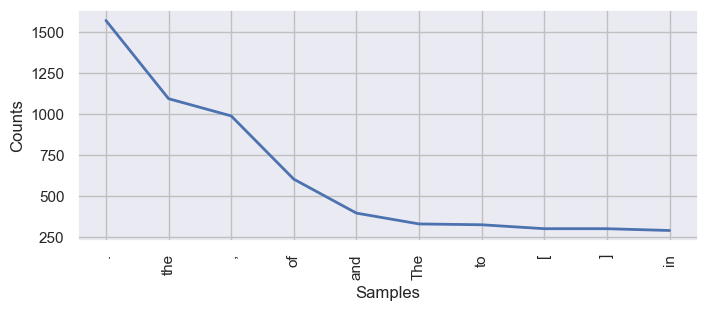

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stopwords

5. Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.

In [8]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'same', 'such', 'their', 'after', 'by', "you're", 'have', 'his', 'no', 'its', 't', 'up', 'will', 're', 'you', "weren't", 'this', 'hasn', "doesn't", 'if', 'weren', 'ain', 'but', 'about', 'mightn', 'all', 'me', 'isn', 'theirs', 'while', 'nor', 'mustn', 'how', 'until', 'against', 'an', 'most', 'her', 'during', 'they', 'be', 'very', 'wouldn', 'over', 'shouldn', 'now', "won't", "didn't", "hadn't", 'had', 'hers', "should've", 'few', 'were', 'hadn', "wasn't", "wouldn't", 'or', "haven't", 'we', 'for', 'again', 'just', "shouldn't", 'between', 'it', 'do', 'once', 'there', 'only', 'ma', 'to', 'under', 'being', 'can', 'myself', 'ours', 'am', 'ourselves', 'those', 'so', 'couldn', 'which', 'him', 'down', 'them', 'been', 'yourselves', 'out', 'these', 'of', 'both', 'that', 'off', 'm', 'himself', 'he', 'won', 'each', "mightn't", 'who', 'than', 'our', 'on', 'yours', "don't", "hasn't", 'has', 'is', 'and', 'here', 'more', "you've", 'doing', 'before', 'other', 'o', 'then', 'should', 'd', 'through', 'as', 

In [9]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [10]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4780 samples and 16513 outcomes>


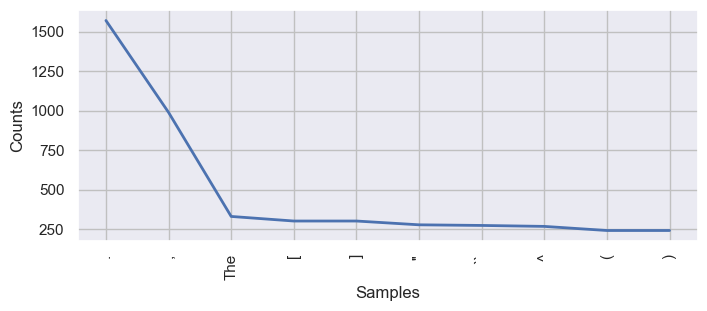

In [11]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [12]:
dist_words_filter

FreqDist({'.': 1572, ',': 990, 'The': 331, '[': 302, ']': 302, "''": 278, '``': 274, '^': 268, '(': 242, ')': 242, ...})

In [13]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [14]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', '

In [15]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

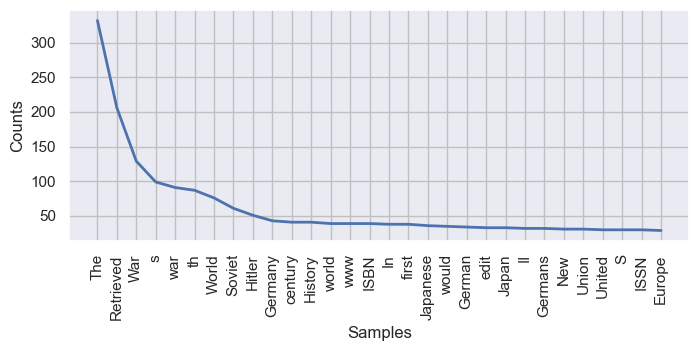

In [16]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

Comment Box Filler for #5

## POS tags

6. Create a tags list using TextBlob.

In [17]:
new_stopwords = ["New", "would", 'www', 'th', 's', 'The', 'In', 'II', 'S', 'edit' ]

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [18]:
%%time
text = TextBlob(str(filtered))

CPU times: user 13.4 ms, sys: 216 μs, total: 13.6 ms
Wall time: 4.73 ms


In [19]:
tags_list = text.tags

In [20]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Personal", 'NNP'),
 ("'"

7. Create a list of the Top 10 POS tags for words that appear in the article.

In [21]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [22]:
df_text.head()

Words Word type
0        [        JJ
1     'Key       NNP
2        '       POS
3  'events       NNS
4        '       POS

In [23]:
df_t = df_text.groupby('Word type').count().reset_index()

In [24]:
df_t.head()

Word type  Words
0        CC      1
1        CD     75
2        DT     13
3        EX     12
4        FW     43

8. Plot this list in a bar chart using the seaborn library. Note: If you were with us for the Data Immersion Program, you’ve already learned about seaborn in Achievement 4. If Seaborn is new to you, use this introductory resource to walk you through it.

In [25]:
top10 = df_t.nlargest(10, 'Words')

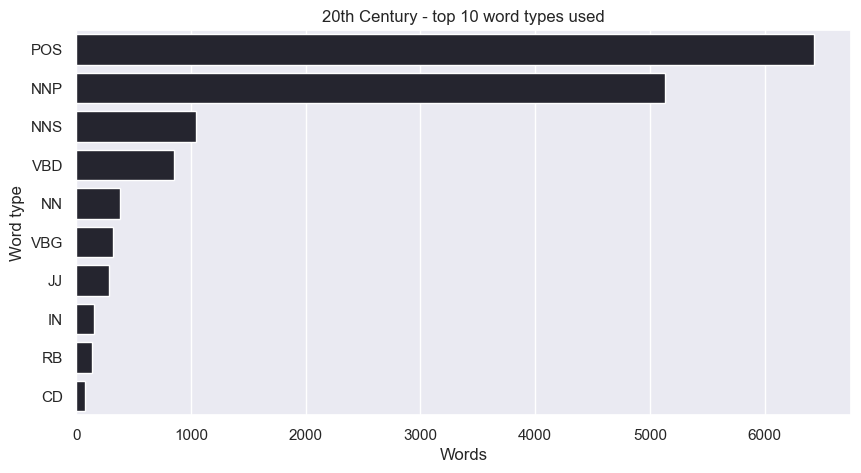

In [26]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century - top 10 word types used")

9. Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies? Comment on your impressions in a Markdown cell under the plot.

### Nouns

In [27]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [28]:
top15

Word  Occurences
1257      'War         129
2577      'war          91
1304    'World          76
1103   'Soviet          61
537    'Hitler          51
536   'History          41
1494  'century          41
2603    'world          39
558      'ISBN          39
1774    'first          38
475    'German          34
476   'Germans          32
1219    'Union          31
560      'ISSN          30
1370     'also          29

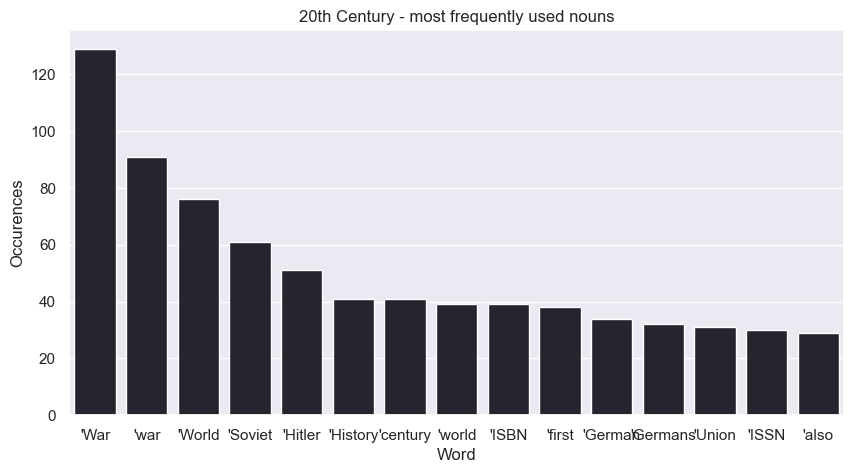

In [29]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th Century - most frequently used nouns")

### Verbs

In [30]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [31]:
top15

Word  Occurences
26     'Retrieved         206
35        'United          30
0         'Allied          19
195          'led          15
315         'used          13
193     'launched          12
1       'Archived          10
92    'controlled           9
160       'forced           8
307       'turned           7
299  'surrendered           7
76       'changed           7
98       'created           6
230      'planned           6
293     'suffered           6

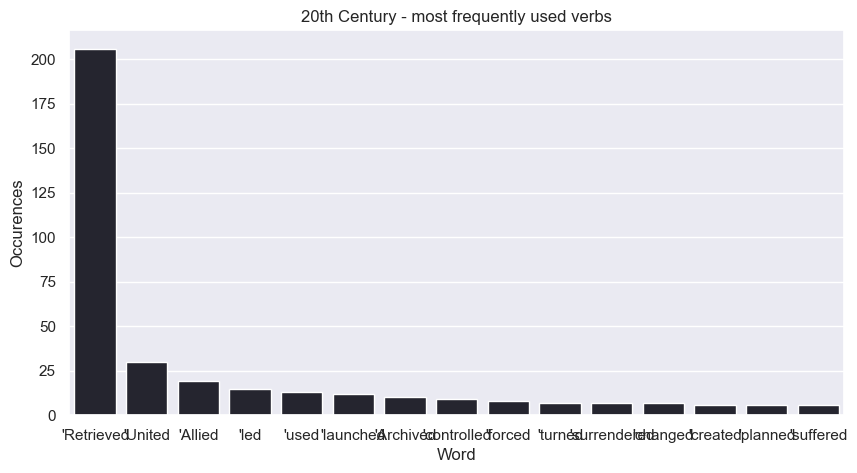

In [32]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th Century - most frequently used verbs")

### Adjectives

In [33]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [34]:
top15

Word  Occurences
28     'Japanese          36
2      'American          24
5      'Atlantic          13
20     'Guardian          10
14      'Chinese           7
43      'Russian           6
1       'African           6
104   'political           6
105    'possible           5
7        'Baltic           5
6    'Australian           4
52        'These           4
10        'Brian           4
92      'medical           4
27      'Italian           4

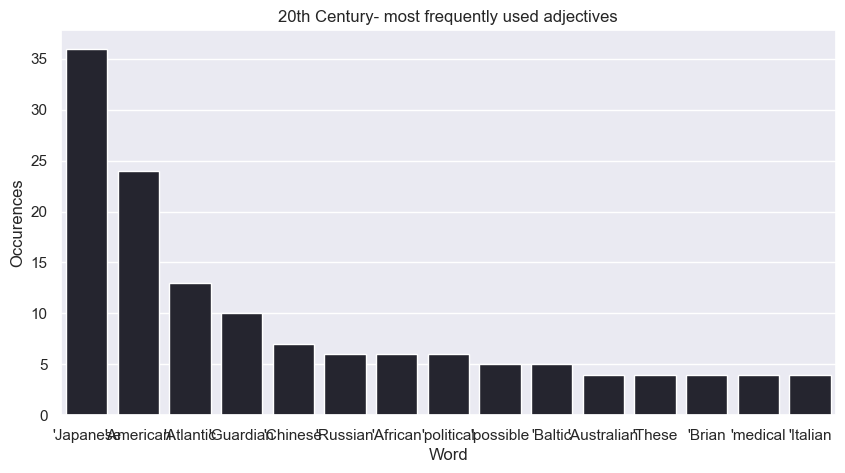

In [35]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th Century- most frequently used adjectives")

## Country Counts

10. Create a dataframe with the countries and the number of times they’re mentioned in your text 

In [36]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Appearance Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table contents Key

In [37]:
# Create a count for countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [38]:
all_counts

Counter({'Retrieved': 206,
         'War': 129,
         'war': 91,
         'World': 76,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'century': 41,
         'History': 41,
         'world': 39,
         'ISBN': 39,
         'first': 38,
         'Japanese': 36,
         'German': 34,
         'Japan': 33,
         'Germans': 32,
         'Union': 31,
         'United': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'history': 24,
         'This': 24,
         'American': 24,
         'weapons': 24,
         'attack': 23,
         'Main': 22,
         'Holocaust': 22,
         'new': 22,
         'Stalin': 21,
         'Africa': 21,
         'British': 20,
         'Nazi': 20,
         'Britain': 20,
         'North': 20,
         'Allied': 19,
         '

In [39]:
chars = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [40]:
chars.head()

country_name
1   Afghanistan 
2       Albania 
3       Algeria 
4       Andorra 
5        Angola

In [41]:
chars_list = chars['country_name'].to_list()

In [42]:
chars_list

[' Afghanistan ',
 '  Albania ',
 '  Algeria ',
 '  Andorra ',
 '  Angola ',
 '  Antigua and Barbuda ',
 '  Argentina ',
 '  Armenia ',
 '  Australia ',
 '  Austria ',
 '  Azerbaijan',
 ' Bahamas, The ',
 '  Bahrain ',
 '  Bangladesh ',
 '  Barbados ',
 '  Belarus ',
 '  Belgium ',
 '  Belize ',
 '  Benin ',
 '  Bhutan ',
 '  Bolivia ',
 '  Bosnia and Herzegovina ',
 '  Botswana ',
 '  Brazil ',
 '  Brunei ',
 '  Bulgaria ',
 '  Burkina Faso ',
 '  Burundi',
 ' Cambodia ',
 '  Cameroon ',
 '  Canada ',
 '  Cape Verde ',
 '  Central African Republic ',
 '  Chad ',
 '  Chile ',
 "  China, People's Republic of ",
 '  Colombia ',
 '  Comoros ',
 '  Congo, Democratic Republic of the ',
 '  Congo, Republic of the ',
 '  Costa Rica ',
 '  Croatia ',
 '  Cuba ',
 '  Cyprus ',
 '  Czech Republic',
 '  Denmark ',
 '   Djibouti ',
 '   Dominica ',
 '   Dominican Republic',
 '  East Timor ',
 '   Ecuador ',
 '   Egypt ',
 '   El Salvador ',
 '   Equatorial Guinea ',
 '   Eritrea ',
 '   Estonia ',

In [43]:
dict_of_counts = {d : all_counts[d] for d in chars_list}

In [44]:
dict_of_counts

{' Afghanistan ': 0,
 '  Albania ': 0,
 '  Algeria ': 0,
 '  Andorra ': 0,
 '  Angola ': 0,
 '  Antigua and Barbuda ': 0,
 '  Argentina ': 0,
 '  Armenia ': 0,
 '  Australia ': 0,
 '  Austria ': 0,
 '  Azerbaijan': 0,
 ' Bahamas, The ': 0,
 '  Bahrain ': 0,
 '  Bangladesh ': 0,
 '  Barbados ': 0,
 '  Belarus ': 0,
 '  Belgium ': 0,
 '  Belize ': 0,
 '  Benin ': 0,
 '  Bhutan ': 0,
 '  Bolivia ': 0,
 '  Bosnia and Herzegovina ': 0,
 '  Botswana ': 0,
 '  Brazil ': 0,
 '  Brunei ': 0,
 '  Bulgaria ': 0,
 '  Burkina Faso ': 0,
 '  Burundi': 0,
 ' Cambodia ': 0,
 '  Cameroon ': 0,
 '  Canada ': 0,
 '  Cape Verde ': 0,
 '  Central African Republic ': 0,
 '  Chad ': 0,
 '  Chile ': 0,
 "  China, People's Republic of ": 0,
 '  Colombia ': 0,
 '  Comoros ': 0,
 '  Congo, Democratic Republic of the ': 0,
 '  Congo, Republic of the ': 0,
 '  Costa Rica ': 0,
 '  Croatia ': 0,
 '  Cuba ': 0,
 '  Cyprus ': 0,
 '  Czech Republic': 0,
 '  Denmark ': 0,
 '   Djibouti ': 0,
 '   Dominica ': 0,
 '   Do